In [65]:
#Dependencies
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow import keras
print("Tensorflow Version:",tf.__version__)
print("Keras Version", keras.__version__)

Tensorflow Version: 2.1.0
Keras Version 2.2.4-tf


# Preparations

## Importing Structural Data

In [2]:
#File directory
ser_path = "./serialized/"
#change directory to datasets
os.chdir("../datasets")

In [3]:
structural = pd.read_pickle(ser_path + "structural_merged.pkl")

In [4]:
structural = structural.groupby(['calendar_day','year','month', 'week','block']).sum()
structural = structural.reset_index()

In [5]:
structural.columns

Index(['calendar_day', 'year', 'month', 'week', 'block', 'IN_tons',
       'SO_order_qty_sales_units', 'SH_shipment_tons', 'PR_ton'],
      dtype='object')

In [6]:
#rearanging columns
structural = structural[['calendar_day', 'year', 'month', 'week', 
                        'block', 'IN_tons', 'PR_ton',
                        'SO_order_qty_sales_units', 'SH_shipment_tons']]

In [7]:
structural.shape

(50323, 9)

In [24]:
#change applicable dtypes into categories
structural.month = structural.month.astype('category')
structural.week = structural.week.astype('category')
structural.block = structural.block.astype('category')
#change applicable dtype to object
structural.year = structural.year.astype('object')

In [25]:
structural.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50323 entries, 0 to 50322
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   calendar_day              50323 non-null  datetime64[ns]
 1   year                      50323 non-null  object        
 2   month                     50323 non-null  category      
 3   week                      50323 non-null  category      
 4   block                     50323 non-null  category      
 5   IN_tons                   50323 non-null  float64       
 6   PR_ton                    50323 non-null  float64       
 7   SO_order_qty_sales_units  50323 non-null  float64       
 8   SH_shipment_tons          50323 non-null  float64       
dtypes: category(3), datetime64[ns](1), float64(4), object(1)
memory usage: 2.5+ MB


In [8]:
structural.head()

,calendar_day,year,month,week,block,IN_tons,PR_ton,SO_order_qty_sales_units,SH_shipment_tons
0,2016-01-02,2016,1,53,"5"" ANG",0.0,0.0,39.0000,0.0
1,2016-01-02,2016,1,53,"5"" FLT",0.0,0.0,3.0600,0.0
2,2016-01-03,2016,1,53,"1"" FLT",0.0,0.0,10.0980,0.0
3,2016-01-03,2016,1,53,"1"" SB FLT",0.0,0.0,22.5600,0.0
4,2016-01-03,2016,1,53,"1-2"" LRG FLT",0.0,0.0,4.9385,0.0


## Import structural weekly with indicators

In [61]:
#Import Dataframe
struct_indicators = pd.read_pickle(ser_path + "structuralweekly_with_indicators.pkl")
struct_indicators.head()

,calendar_day,year,month,global_steel_utilization,fed_construction$B,state_local_construction$B,carbon_bar_ship_usa,carbon_bar_ship_canada,structural_ship_usa,structural_ship_canada,ism_manufacturing,ism_non_manufacturing,chicago_scrap$ST,block,IN_tons,PR_ton,SO_order_qty_sales_units,SH_shipment_tons
0,2016-01-03,2016,1,0.66,1583.0,16684.0,204300.0,30800.0,175300.0,38700.0,48.2,53.5,180.0,"3-1/2"" ANG",207.261,0.0,0.0,0.0
1,2016-01-03,2016,1,0.66,1583.0,16684.0,204300.0,30800.0,175300.0,38700.0,48.2,53.5,180.0,"9"" CHN",43.296,0.0,0.0,0.0
2,2016-01-03,2016,1,0.66,1583.0,16684.0,204300.0,30800.0,175300.0,38700.0,48.2,53.5,180.0,"8 X 4"" ANG",14.112,0.0,0.0,0.0
3,2016-01-03,2016,1,0.66,1583.0,16684.0,204300.0,30800.0,175300.0,38700.0,48.2,53.5,180.0,"6"" CHN",1857.997,0.0,0.0,0.0
4,2016-01-03,2016,1,0.66,1583.0,16684.0,204300.0,30800.0,175300.0,38700.0,48.2,53.5,180.0,"4 X 3"" ANG",472.990,0.0,0.0,0.0


In [62]:
#change applicable dtypes into categories
struct_indicators.month = struct_indicators.month.astype('category')
struct_indicators.block = struct_indicators.block.astype('category')
#change applicable dtype to object
struct_indicators.year = struct_indicators.year.astype('object')

In [63]:
#maybe drop year and month
#struct_indicators = struct_indicators.drop(columns=['year','month'])

In [64]:
struct_indicators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12519 entries, 0 to 12518
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   calendar_day                12519 non-null  datetime64[ns]
 1   year                        12519 non-null  object        
 2   month                       12519 non-null  category      
 3   global_steel_utilization    12519 non-null  float64       
 4   fed_construction$B          12519 non-null  float64       
 5   state_local_construction$B  12519 non-null  float64       
 6   carbon_bar_ship_usa         12519 non-null  float64       
 7   carbon_bar_ship_canada      12519 non-null  float64       
 8   structural_ship_usa         12519 non-null  float64       
 9   structural_ship_canada      12519 non-null  float64       
 10  ism_manufacturing           12519 non-null  float64       
 11  ism_non_manufacturing       12519 non-null  float64   

## Indexing Train Test Splits for Time Series

In [70]:
year_list = struct_indicators['year'].unique().tolist()
splits = {'train': [], 'test': []}

#note exception, we only have 3 series (2019 + 2020) should be aggregated because we only have a couple day-points in 2020
for idx, yr in enumerate(year_list[:-1]):
    train_yr = year_list[:idx+1]
    test_yr = [year_list[idx+1]]
    print('TRAIN: ', train_yr, 'TEST: ',test_yr)

    splits['train'].append(struct_indicators.loc[struct_indicators.year.isin(train_yr), :])
    splits['test'].append(struct_indicators.loc[struct_indicators.year.isin(test_yr), :])

TRAIN:  [2016] TEST:  [2017]
TRAIN:  [2016, 2017] TEST:  [2018]
TRAIN:  [2016, 2017, 2018] TEST:  [2019]
TRAIN:  [2016, 2017, 2018, 2019] TEST:  [2020]


In [78]:
print("Size of Train 2016:",splits['train'][0].shape)
print("Size of Test 2017:",splits['test'][0].shape)
print("Size of Train 2016-17:",splits['train'][1].shape)
print("Size of Test 2018:",splits['test'][1].shape)
print("Size of Train 2016-18:",splits['train'][2].shape)
print("Size of Test 2019:",splits['test'][2].shape)
print("Size of Train 2016-19:",splits['train'][3].shape)
print("Size of Test 2020:",splits['test'][3].shape)

Size of Train 2016: (2867, 18)
Size of Test 2017: (3328, 18)
Size of Train 2016-17: (6195, 18)
Size of Test 2018: (3260, 18)
Size of Train 2016-18: (9455, 18)
Size of Test 2019: (3018, 18)
Size of Train 2016-19: (12473, 18)
Size of Test 2020: (46, 18)


In [99]:
#see where the split falls
struct_indicators.iloc[9454:9457,:]

,calendar_day,year,month,global_steel_utilization,fed_construction$B,state_local_construction$B,carbon_bar_ship_usa,carbon_bar_ship_canada,structural_ship_usa,structural_ship_canada,ism_manufacturing,ism_non_manufacturing,chicago_scrap$ST,block,IN_tons,PR_ton,SO_order_qty_sales_units,SH_shipment_tons
9454,2018-12-30,2018,12,0.7620,1783.0,19153.0,177300.0,21900.0,174200.0,25500.0,54.3,58.0,405.0,"6"" FLT",6793.732139,-2.0,290.1270,3.0
9455,2019-01-06,2019,1,0.7768,1601.0,18166.0,222800.0,34800.0,201600.0,34200.0,56.6,56.7,375.0,"1"" FLT",0.004000,0.0,15.0590,3.0
9456,2019-01-06,2019,1,0.7768,1601.0,18166.0,222800.0,34800.0,201600.0,34200.0,56.6,56.7,375.0,"5"" CHN",4213.412014,-9.0,110.9505,39.0


### Univariate Train Test Split

In [113]:
#function to split univariate data for checking
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

#### Creating Univariate Data
- focusing on 4" ANG only

In [85]:
#Checking Univariate on 4" ANG
uni_data = struct_indicators[struct_indicators['block']=='4" ANG']['SH_shipment_tons']
uni_data.index = struct_indicators[struct_indicators['block']=='4" ANG']['calendar_day']
uni_data.shape

(210,)

In [94]:
#convert to Dataframe for scaling
uni_data = pd.DataFrame(uni_data)

In [111]:
#check last 2018 number
uni_data[uni_data.index.year<=2018]
uni_data.iloc[155:158,:]

,SH_shipment_tons
calendar_day,
2018-12-23,138.0
2018-12-30,75.0
2019-01-06,53.0


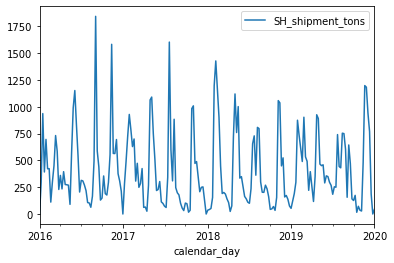

In [118]:
#Plotting The Shipments of 4" ANG
uni_data.plot()

# Modeling Univariate

## Data Prep for LSTM Univariate

### Encode & Scale Data
- if scale does not work attempt min-max

#### Univariate Data

In [87]:
scale = StandardScaler()

In [267]:
uni_data_scaled = scale.fit_transform(uni_data)

### Splitting Train-Test

In [268]:
#matches value of index 156, last day in 2018 -> use 157 as limitation
scale.inverse_transform(uni_data_scaled[156])

array([75.])

In [269]:
print ('Single window of past history')
print (x_train_uni[0])
print ('\n Target shipments to predict')
print (y_train_uni[0])

Single window of past history
[[-1.17425511]
 [-0.32067192]
 [ 1.51869926]
 [-0.04764026]]

 Target shipments to predict
[0.82606105]


In [270]:
#Splitting time frames
TRAIN_SPLIT = 157
univariate_past_history = 4
univariate_future_target = 0

#training set
x_train_uni, y_train_uni = univariate_data(uni_data_scaled, 0, TRAIN_SPLIT,
                                            univariate_past_history, 
                                            univariate_future_target)
#test set
x_val_uni, y_val_uni = univariate_data(uni_data_scaled, TRAIN_SPLIT, None,
                                            univariate_past_history, 
                                            univariate_future_target)

### Create function to Show Model History, True-Future & Prediction

In [271]:
#function to show the appropriate time-step
def create_time_steps(length):
  return list(range(-length, 0))

In [272]:
#function for plotting
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

<module 'matplotlib.pyplot' from '/Users/jacosta3/.local/share/virtualenvs/pft-FTlP17jZ/lib/python3.7/site-packages/matplotlib/pyplot.py'>

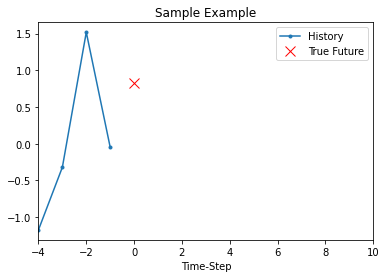

In [273]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

#### Multivariate Data

In [274]:
## Input size: sample, time_step, n_features

In [275]:
#setting seed for reproductability
tf.random.set_seed(42)

## Univariate Base Model

In [276]:
#setting batch size for 3 months (the size of a production cycle)
BATCH_SIZE = 12
BUFFER_SIZE = 300

#setting up memory and batch sizes
train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
#no chace nor shuffle for validation
val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [277]:
x_train_uni.shape[-2:]

(4, 1)

In [278]:
#architecture
simple_lstm = keras.models.Sequential([
    keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    keras.layers.Dense(1)
])

#compiler
simple_lstm.compile(optimizer='adam', loss='mae')

In [279]:
for x,y in val_univariate.take(1):
    print(simple_lstm.predict(x).shape)

(12, 1)


In [280]:
#fitting the model
EPOCHS=12
EVALUATION_INTERVAL=156

simple_lstm.fit(train_univariate, epochs=EPOCHS,
                steps_per_epoch=EVALUATION_INTERVAL,
                validation_data=val_univariate,
                validation_steps=50)

Train for 156 steps, validate for 50 steps
Epoch 1/12
156/156 [==============================] - 5s 35ms/step - loss: 0.7112 - val_loss: 0.6428
Epoch 2/12
156/156 [==============================] - 1s 9ms/step - loss: 0.6091 - val_loss: 0.5669
Epoch 3/12
156/156 [==============================] - 1s 9ms/step - loss: 0.5731 - val_loss: 0.5017
Epoch 4/12
156/156 [==============================] - 1s 9ms/step - loss: 0.5407 - val_loss: 0.4582
Epoch 5/12
156/156 [==============================] - 2s 10ms/step - loss: 0.5186 - val_loss: 0.4474
Epoch 6/12
156/156 [==============================] - 2s 10ms/step - loss: 0.5005 - val_loss: 0.4447
Epoch 7/12
156/156 [==============================] - 2s 10ms/step - loss: 0.4883 - val_loss: 0.4421
Epoch 8/12
156/156 [==============================] - 2s 10ms/step - loss: 0.4791 - val_loss: 0.4454
Epoch 9/12
156/156 [==============================] - 1s 9ms/step - loss: 0.4751 - val_loss: 0.4501
Epoch 10/12
156/156 [==============================]

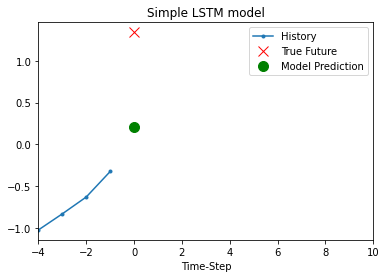

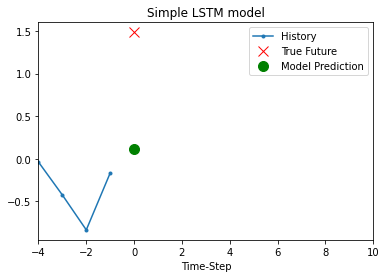

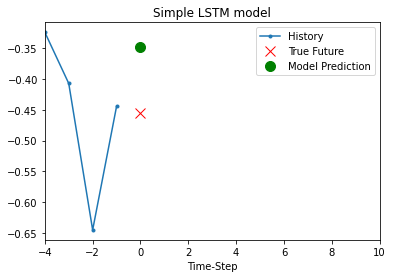

In [220]:
for x, y in val_univariate.take(3):
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm.predict(x)[0]], 0, 'Simple LSTM model')
  plot.show()

# Model Multivariate 

## Data Prep Multivariate

In [281]:
#checking spot for train_split
struct_indicators.iloc[9454:9457,:]

,calendar_day,year,month,global_steel_utilization,fed_construction$B,state_local_construction$B,carbon_bar_ship_usa,carbon_bar_ship_canada,structural_ship_usa,structural_ship_canada,ism_manufacturing,ism_non_manufacturing,chicago_scrap$ST,block,IN_tons,PR_ton,SO_order_qty_sales_units,SH_shipment_tons
9454,2018-12-30,2018,12,0.7620,1783.0,19153.0,177300.0,21900.0,174200.0,25500.0,54.3,58.0,405.0,"6"" FLT",6793.732139,-2.0,290.1270,3.0
9455,2019-01-06,2019,1,0.7768,1601.0,18166.0,222800.0,34800.0,201600.0,34200.0,56.6,56.7,375.0,"1"" FLT",0.004000,0.0,15.0590,3.0
9456,2019-01-06,2019,1,0.7768,1601.0,18166.0,222800.0,34800.0,201600.0,34200.0,56.6,56.7,375.0,"5"" CHN",4213.412014,-9.0,110.9505,39.0


In [375]:
#test model with/without month
data = struct_indicators.drop(columns=['calendar_day','year'])
#data = struct_indicators.drop(columns=['year','month'])

In [376]:
data.index = struct_indicators['calendar_day']

In [377]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12519 entries, 2016-01-03 to 2020-01-05
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   month                       12519 non-null  category
 1   global_steel_utilization    12519 non-null  float64 
 2   fed_construction$B          12519 non-null  float64 
 3   state_local_construction$B  12519 non-null  float64 
 4   carbon_bar_ship_usa         12519 non-null  float64 
 5   carbon_bar_ship_canada      12519 non-null  float64 
 6   structural_ship_usa         12519 non-null  float64 
 7   structural_ship_canada      12519 non-null  float64 
 8   ism_manufacturing           12519 non-null  float64 
 9   ism_non_manufacturing       12519 non-null  float64 
 10  chicago_scrap$ST            12519 non-null  float64 
 11  block                       12519 non-null  category
 12  IN_tons                     12519 non-null  float64 
 13 

In [378]:
#data.plot(subplots=True)

### Selecting only 4" ANG

In [379]:
data = data[data['block']=='4" ANG']

In [380]:
# #pick categories transformers 
#cat_attribs = ['block']
cat_attribs = ['block','month']

# #pick numerical transformers
#num_attribs = list(data.drop(columns=['block']))
num_attribs = list(data.drop(columns=['block', 'month']))

### Selecting Less columns

columns=['monthly','global_steel_utilization', 'fed_construction$B',
       'state_local_construction$B', 'carbon_bar_ship_usa',
       'carbon_bar_ship_canada', 'structural_ship_usa',
       'structural_ship_canada', 'ism_manufacturing', 'ism_non_manufacturing',
       'chicago_scrap$ST', 'block', 'IN_tons', 'PR_ton',
       'SO_order_qty_sales_units', 'SH_shipment_tons']

In [396]:
## comeback here
columns = ['month','global_steel_utilization', 'fed_construction$B',
       'state_local_construction$B', 'carbon_bar_ship_usa',
       'carbon_bar_ship_canada', 'structural_ship_usa',
       'structural_ship_canada', 'ism_manufacturing', 'ism_non_manufacturing',
       'chicago_scrap$ST','block', 'IN_tons', 'PR_ton',
       'SO_order_qty_sales_units', 'SH_shipment_tons']

data = data[columns]

In [397]:
#create pipeline to encode and scale variables
pipeline = ColumnTransformer([
    ('num', StandardScaler(), num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

In [398]:
#preparing data
data_prepared = pipeline.fit_transform(data)

In [399]:
data_prepared.shape

(210, 27)

In [400]:
#function to split multivariate data
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [401]:
#data split for all blocks by time frame
TRAIN_SPLIT2 = 157
past_history = 4
future_target = 0
STEP = 1

x_train_single, y_train_single = multivariate_data(data_prepared, data_prepared[:, -1], 0,
                                                   TRAIN_SPLIT2, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(data_prepared, data_prepared[:, -1],
                                               TRAIN_SPLIT2, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [402]:
print ('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (4, 27)


In [403]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [404]:
single_step_model = keras.models.Sequential()
single_step_model.add(keras.layers.LSTM(216,
                                           input_shape=x_train_single.shape[-2:]))
single_step_model.add(keras.layers.Dense(1))

single_step_model.compile(optimizer=keras.optimizers.RMSprop(), loss='mae')

In [405]:
for x, y in val_data_single.take(1):
  print(single_step_model.predict(x).shape)

(12, 1)


In [406]:
keras.backend.clear_session()
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

Train for 156 steps, validate for 50 steps
Epoch 1/12
156/156 [==============================] - 6s 41ms/step - loss: 0.1012 - val_loss: 0.2273
Epoch 2/12
156/156 [==============================] - 3s 19ms/step - loss: 0.0632 - val_loss: 0.2710
Epoch 3/12
156/156 [==============================] - 4s 24ms/step - loss: 0.0489 - val_loss: 0.2280
Epoch 4/12
156/156 [==============================] - 3s 20ms/step - loss: 0.0401 - val_loss: 0.2283
Epoch 5/12
156/156 [==============================] - 3s 22ms/step - loss: 0.0342 - val_loss: 0.2048
Epoch 6/12
156/156 [==============================] - 3s 21ms/step - loss: 0.0304 - val_loss: 0.2498
Epoch 7/12
156/156 [==============================] - 3s 19ms/step - loss: 0.0257 - val_loss: 0.2430
Epoch 8/12
156/156 [==============================] - 3s 18ms/step - loss: 0.0237 - val_loss: 0.2170
Epoch 9/12
156/156 [==============================] - 3s 18ms/step - loss: 0.0213 - val_loss: 0.1836
Epoch 10/12
156/156 [===========================

In [407]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

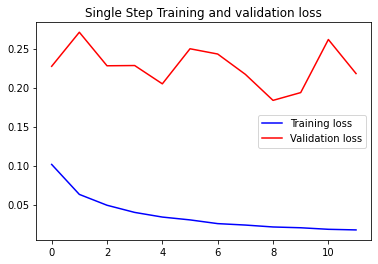

In [408]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

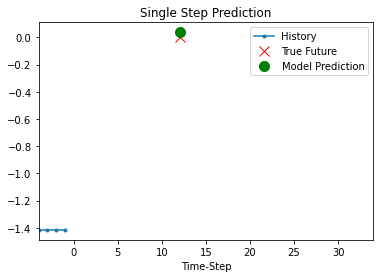

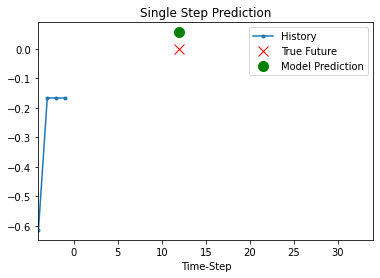

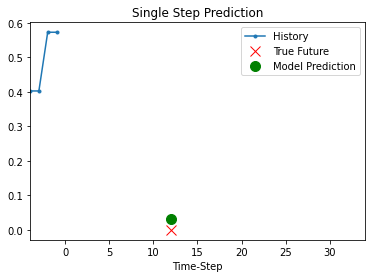

In [409]:
for x, y in val_data_single.take(3):
  plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 12,
                   'Single Step Prediction')
  plot.show()

## Multivariate single-step

## Multivariate multi-step (multiple future predictions)